# Climate Change

In [2]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import Data from dataset
#file_basic_path="data_sets/"
#newFile = pd.ExcelFile("data_sets/climate_change_data.xls")
#climchang_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Data")
#climchang_df.columns

In [4]:
#year=[1990+x for x in range(22)]
#for x in year:
    #climchang_df[x]=pd.to_numeric(climchang_df[x],errors='coerce')

In [5]:
#climchang_df['Series name'].unique()

In [6]:
#co2_df=climchang_df[climchang_df['Series name']=='CO2 emissions per capita (metric tons)']
#co2_df

### Is there a correlation between yearly global average temperature and yearly average global CO2 level ?
* Null hypothesis: There is no correlation between yearly global average temp and yearly average global CO2 levels
* Alternative hypothesis: There is a positive correlation between yearly global average temp and yearly average global CO2 levels

### If there is a correlation between an increase in global temperature and CO2 levels, then is there a relationship between a country’s average temperature and their CO2 level? Can we see a local effect on a country’s temperature from their CO2 levels?
* Null Hypothesis: A country’s increase in CO2 level does not increase the country’s average temperature (by year)
* Alternative Hypothesis: A country’s increase in CO2 level does increase the country’s average temperature.

In [7]:
# Import data from dataset
df_temp = pd.read_csv("data_sets/GlobalLandTemperaturesByCountry.csv")
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [8]:
np.dtype(df_temp["dt"])

dtype('O')

In [9]:
df_temp.dropna(how = "any", inplace = True)
df_temp

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
...,...,...,...,...
577456,2013-04-01,21.142,0.495,Zimbabwe
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe


In [10]:
# retrieving first value in list of values separated by hyphen
splited_series = df_temp['dt'].str.split('-').str[0]
splited_series

0         1743
5         1744
6         1744
7         1744
8         1744
          ... 
577456    2013
577457    2013
577458    2013
577459    2013
577460    2013
Name: dt, Length: 544811, dtype: object

In [11]:
#adding as new series and check whether new column for year is added
df_temp["Year"] = splited_series.astype("int64")
df_temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Year
0,1743-11-01,4.384,2.294,Åland,1743
5,1744-04-01,1.530,4.680,Åland,1744
6,1744-05-01,6.702,1.789,Åland,1744
7,1744-06-01,11.609,1.577,Åland,1744
8,1744-07-01,15.342,1.410,Åland,1744


In [12]:
#check data type
print(np.dtype(df_temp["Year"]))

int64


In [13]:
# Drop dt column
df_temp.drop(["dt"], axis=1, inplace=True)

In [14]:
# Create DF with data regions
region_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Country")
region_df.head()

,Country code,Country name,Capital city,Region,Income group,Lending category
0,EAP,East Asia & Pacific,..,Aggregates,Aggregates,Aggregates
1,ECA,Europe & Central Asia,..,Aggregates,Aggregates,Aggregates
2,EMU,Euro area,..,Aggregates,Aggregates,Aggregates
3,HIC,High income,..,Aggregates,Aggregates,Aggregates
4,LAC,Latin America & Caribbean,..,Aggregates,Aggregates,Aggregates


In [15]:
list(region_df)

['Country code',
 'Country name',
 'Capital city',
 'Region',
 'Income group',
 'Lending category']

In [16]:
# Create df for regions
df = pd.DataFrame(region_df, columns= ['Region', "Country name"])
df.rename(columns = {"Country name": "Country"}, inplace=True)
df

,Region,Country
0,Aggregates,East Asia & Pacific
1,Aggregates,Europe & Central Asia
2,Aggregates,Euro area
3,Aggregates,High income
4,Aggregates,Latin America & Caribbean
...,...,...
228,Middle East & North Africa,"Yemen, Rep."
229,Sub-Saharan Africa,South Africa
230,Sub-Saharan Africa,"Congo, Dem. Rep."
231,Sub-Saharan Africa,Zambia


In [17]:
# Add column for region into df_temp
df_temp["Region"]=""
df_temp

,AverageTemperature,AverageTemperatureUncertainty,Country,Year,Region
0,4.384,2.294,Åland,1743,
5,1.530,4.680,Åland,1744,
6,6.702,1.789,Åland,1744,
7,11.609,1.577,Åland,1744,
8,15.342,1.410,Åland,1744,
...,...,...,...,...,...
577456,21.142,0.495,Zimbabwe,2013,
577457,19.059,1.022,Zimbabwe,2013,
577458,17.613,0.473,Zimbabwe,2013,
577459,17.000,0.453,Zimbabwe,2013,


In [18]:
# Populate Region column through an merge
df_final = pd.merge(df_temp, df, on='Country')
df_final.drop(["Region_x", "AverageTemperatureUncertainty"],axis=1, inplace=True)
df_final.rename(columns = {"Region_y": "Region"}, inplace=True)
df_final[["Year", "Region", "Country", "AverageTemperature"]]

,Year,Region,Country,AverageTemperature
0,1838,South Asia,Afghanistan,13.008
1,1838,South Asia,Afghanistan,23.950
2,1838,South Asia,Afghanistan,26.877
3,1838,South Asia,Afghanistan,24.938
4,1838,South Asia,Afghanistan,18.981
...,...,...,...,...
382306,2013,Sub-Saharan Africa,Zimbabwe,21.142
382307,2013,Sub-Saharan Africa,Zimbabwe,19.059
382308,2013,Sub-Saharan Africa,Zimbabwe,17.613
382309,2013,Sub-Saharan Africa,Zimbabwe,17.000


In [50]:
# Read CO2 data from csv file 
co2_df = pd.read_csv("data_sets/CO2emission.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    co2_df=co2_df.drop(columns=[f"{x}"])
    
co2_df.drop(["Country Code", "Indicator Name", "Indicator Code"],axis=1, inplace=True)
co2_df.rename(columns = {"Country Name": "Country"}, inplace=True)
co2_df

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,9933.903,12236.779,11378.701,...,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746,898.415
1,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
2,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,...,22266.024,25151.953,25709.337,27792.193,29057.308,30586.447,34176.440,33692.396,44851.077,34583.477
3,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,...,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4924.781,4913.780,5489.499,4616.753
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042,465.709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7455.011,8192.078,8426.766,8368.094,7942.722,8074.734,7260.660,8408.431
260,"Yemen, Rep.",58.672,73.340,69.673,80.674,99.009,102.676,99.009,102.676,128.345,...,21316.271,20971.573,22339.364,24565.233,23432.130,20612.207,18698.033,25492.984,24667.909,13171.864
261,South Africa,97934.569,102213.958,105767.281,109826.650,119657.877,128260.659,128356.001,133885.837,138084.552,...,447894.714,466578.079,496772.157,503112.400,469816.040,477370.060,464674.906,459222.077,484495.041,463952.507
262,Zambia,NaN,NaN,NaN,NaN,3278.298,3916.356,3501.985,4792.769,4572.749,...,2291.875,1928.842,2170.864,2508.228,2691.578,2922.599,3678.001,3956.693,4503.076,4532.412


In [52]:
# merge dfs on country
co2_temp = df_final.merge(co2_df,how="inner",on="Country", suffixes=('_temp', '_co2'))
co2_temp.head()

,AverageTemperature,Country,Year,Region,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,13.008,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
1,23.950,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
2,26.877,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
3,24.938,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
4,18.981,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.15,2273.54,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488


In [20]:
# Print regions
df_final["Region"].unique()

array(['South Asia', 'Europe & Central Asia',
       'Middle East & North Africa', 'East Asia & Pacific',
       'Sub-Saharan Africa', 'Latin America & Caribbean', 'North America'],
      dtype=object)

In [56]:
# Create DFs per region first
temp_sa = co2_temp[co2_temp["Region"]=="South Asia"]
df_eca  = co2_temp[co2_temp["Region"]=="Europe & Central Asia"]
df_mena = co2_temp[co2_temp["Region"]=="Middle East & North Africa"]
df_eap = co2_temp[co2_temp["Region"]=="East Asia & Pacific"]
df_ssa = co2_temp[co2_temp["Region"]=="Sub-Saharan Africa"]
df_lac = co2_temp[co2_temp["Region"]=="Latin America & Caribbean"]
df_na = co2_temp[co2_temp["Region"]=="North America"]


In [57]:
# show df per region, test
temp_sa

,AverageTemperature,Country,Year,Region,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,13.008,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
1,23.950,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
2,26.877,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
3,24.938,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
4,18.981,Afghanistan,1838,South Asia,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325224,29.413,Sri Lanka,2013,South Asia,2258.872,2335.879,2563.233,2533.897,2273.540,2658.575,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495
325225,29.389,Sri Lanka,2013,South Asia,2258.872,2335.879,2563.233,2533.897,2273.540,2658.575,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495
325226,28.434,Sri Lanka,2013,South Asia,2258.872,2335.879,2563.233,2533.897,2273.540,2658.575,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495
325227,28.283,Sri Lanka,2013,South Asia,2258.872,2335.879,2563.233,2533.897,2273.540,2658.575,...,11976.422,12354.123,12207.443,13175.531,13263.539,15137.376,16061.460,14913.689,17924.296,20113.495


In [58]:
x_sa = temp_sa[""]
y_sa = ["AverageTemperature"]
plt.plot(x_sa, y_sa)

for x in temp_sa:
    # Plot the CO2/Life expectancy data of each country
    plt.scatter(co2_dict[x], lf_dict[x], alpha=0.5)

KeyError: ''

In [ ]:
# Group by year for each region 


In [43]:
# Group by year for each region and show average temperature per year
temp_sa.groupby(["Year"])["AverageTemperature"].mean()
temp_eca.groupby(["Year"])["AverageTemperature"].mean()
temp_mena.groupby(["Year"])["AverageTemperature"].mean()
temp_eap.groupby(["Year"])["AverageTemperature"].mean()
temp_ssa.groupby(["Year"])["AverageTemperature"].mean()
temp_lac.groupby(["Year"])["AverageTemperature"].mean()
temp_na.groupby(["Year"])["AverageTemperature"].mean()

Year
1768   -1.157000
1769    3.509313
1774   -5.743167
1775    2.644167
1776    1.055174
          ...   
2009    2.501000
2010    3.808833
2011    2.996417
2012    3.542125
2013    4.828222
Name: AverageTemperature, Length: 216, dtype: float64

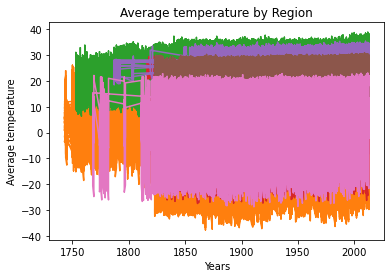

In [30]:
# Line plot South Asia
x_sa = temp_sa["Year"]
y_sa = temp_sa["AverageTemperature"]
plt.plot(x_sa, y_sa)

# Line plot eca
x_eca = temp_eca["Year"]
y_eca = temp_eca["AverageTemperature"]
plt.plot(x_eca, y_eca)

# Line plot mena
x_mena = temp_mena["Year"]
y_mena = temp_mena["AverageTemperature"]
plt.plot(x_mena, y_mena)

# Line plot eap
x_eap = temp_eap["Year"]
y_eap = temp_eap["AverageTemperature"]
plt.plot(x_eap, y_eap)

# Line plot ssa
x_ssa = temp_ssa["Year"]
y_ssa = temp_ssa["AverageTemperature"]
plt.plot(x_ssa, y_ssa)

# Line plot lac
x_lac = temp_lac["Year"]
y_lac = temp_lac["AverageTemperature"]
plt.plot(x_lac, y_lac)

# Line plot na
x_na = temp_na["Year"]
y_na = temp_na["AverageTemperature"]
plt.plot(x_na, y_na)



# Set a Title and labels
ax.set_xticks([0,175,4,6])
plt.title("Average temperature by Region")
plt.xlabel("Years")
plt.ylabel("Average temperature")

plt.show()
plt.tight_layout()

In [36]:
# Read CO2 data from csv file 
co2_df = pd.read_csv("data_sets/CO2emission.csv")

# Clean data after 2015 for later comparison
for x in range(2016,2021):
    # drop the columns if year=x.
    co2_df=co2_df.drop(columns=[f"{x}"])

# rename column
#co2_df.rename(columns = {"Country name": "Country"}, inplace=True)
    
# Preview CO2 emission dataframe
co2_df.head()




,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,...,2717.247,2823.590,2658.575,2629.239,2508.228,2500.894,1349.456,861.745,872.746,898.415
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,1650.150,2273.540,4206.049,6769.282,8463.436,12240.446,10755.311,9050.156,8467.103,9035.488
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,22266.024,25151.953,25709.337,27792.193,29057.308,30586.447,34176.440,33692.396,44851.077,34583.477
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,3898.021,3927.357,4374.731,4378.398,4598.418,5240.143,4924.781,4913.780,5489.499,4616.753
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,546.383,539.049,539.049,517.047,517.047,491.378,487.711,476.710,462.042,465.709


In [64]:
# Merge temp df and CO2 df
merged_df = pd.merge(df_final, co2_df, on = "Country", how = "left", suffixes=('_temp', '_co2'))
merged_df

KeyError: 'Country Name'

In [ ]:
# Ignore everything below this line

In [ ]:
#climchang_df.head()

In [ ]:
# Create DF with data regions
#country_df = pd.read_excel("data_sets/climate_change_data.xls", sheet_name="Country")
#country_df.head()

In [ ]:
# Join two datasets on country code
#join = pd.merge(climchang_df,country_df, on='Country code', how='left')
#join.head()

In [ ]:
# Drop duplicate/irrelevant columns and rename
#join.drop(["SCALE", "Series code", "Decimals", "Country name_y", "Capital city", "Income group", "Lending category"], axis=1, inplace=True)
#join.head()

In [4]:
# Rename columns and df
#join.rename(columns = {"Country name_x": "Country name"}, inplace=True)
#cc_country = join
#cc_country.head()

In [3]:
# show data for series CO2 and temperature only
#series = ['CO2 emissions per capita (metric tons)','Average daily min/max temperature (1961-1990, Celsius)']       
#df = cc_country[cc_country['Series name'].isin(series)]
#df

In [2]:
# transpote tco2 rows to column

In [1]:
#sort by region
#df.sort_values(by="Region", axis=0)
#plt.plot(x_values, y_values)

### Is there a correlation between a country’s wealth (GDP per Capita) and its yearly average CO2 emissions? 
* Null hypothesis: Wealth of a country does not affect CO2 emissions. 
* Alternative hypothesis: The wealthier a country, the more CO2 they emit.

### Is there a correlation between global average temperature and global population? (population value to be taken at the end of each year)
* Null hypothesis: There is no correlation between global yearly average temp and global population.
* Alternative hypothesis: There is a positive correlation between global yearly average temp and global population.

Does this correlation (population vs temperature) exist in individual countries, or does this vary depending on location? Perfectly sets us up for the next 2Q’s

### Is there a correlation between a specific country’s CO2 levels and Temperature vs happiness Index? 
* Null hypothesis: There is no correlation between CO2 levels/Temperature and happiness index
* Alternative hypothesis: As CO2 levels/Temperature increases, citizens of a country is less happy 

### Is there a correlation between a country’s yearly average CO2 levels and life expectancy? Does a country’s CO2 level affect the life expectancy of a population?
* Null hypothesis: There is no correlation between a country’s yearly average CO2 level
* Alternative hypothesis: As CO2 levels increase, a population’s life expectancy decreases.